In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
import io
archivo=files.upload()
data=pd.read_csv(io.BytesIO(archivo['HCV-Egy-Data4.csv']),delimiter=",")

Saving HCV-Egy-Data4.csv to HCV-Egy-Data4.csv


In [ ]:
data.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


In [ ]:
data.head(10)

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1
5,58,2,22,2,2,2,1,2,2,1,...,73,114,29,1157452,1086852,5,5,5,4,4
6,42,2,26,1,1,2,2,2,2,2,...,84,80,28,325694,1034008,275095,214566,635157,12,4
7,48,2,30,1,1,2,2,1,1,2,...,96,53,39,641129,72050,787295,370605,506296,12,3
8,44,1,23,1,1,2,2,2,1,2,...,122,39,45,591441,757361,5,371090,203042,5,2
9,45,1,30,2,1,2,2,1,1,2,...,125,43,30,1151206,230488,267320,275295,555516,4,2


In [ ]:
print(data.groupby("Baselinehistological staging").size())

Baselinehistological staging
1    336
2    332
3    355
4    362
dtype: int64


Verificacion de los datos si tienen distribución normal

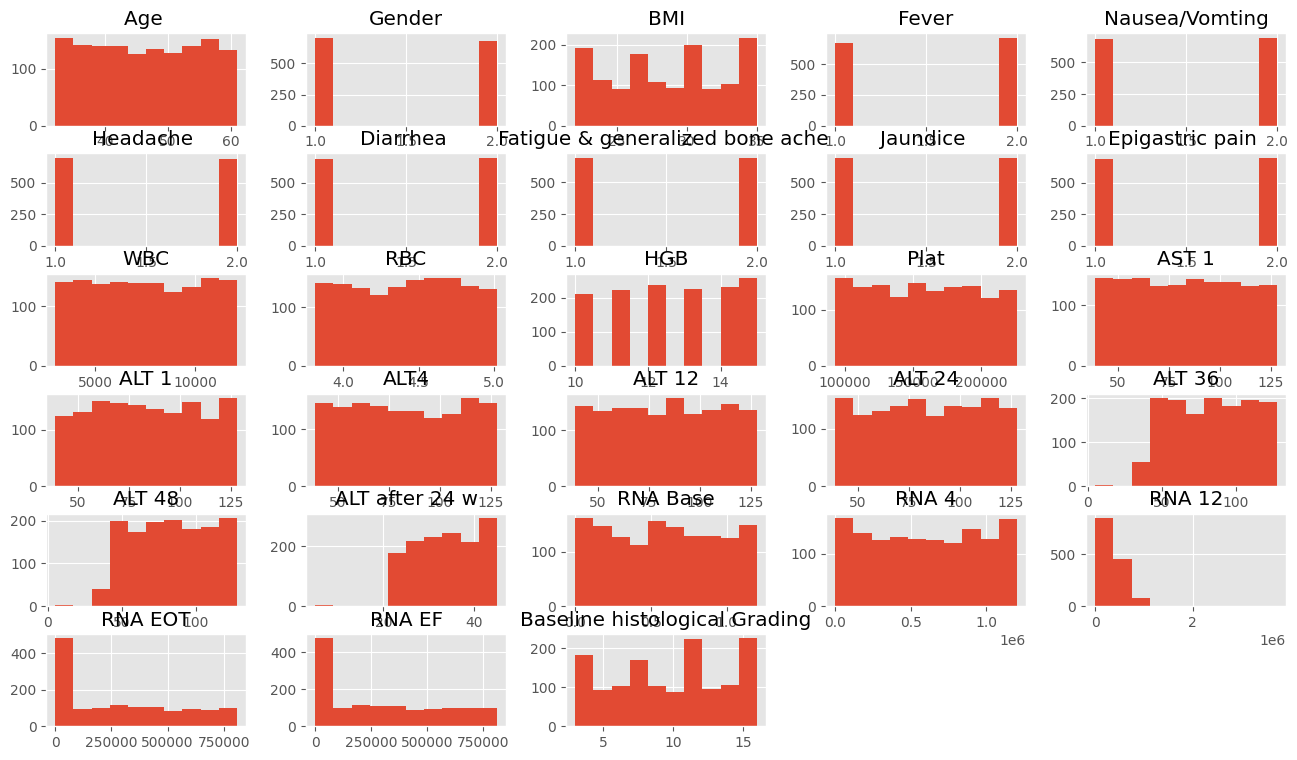

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

data.drop(["Baselinehistological staging"],axis=1).hist()
plt.show()

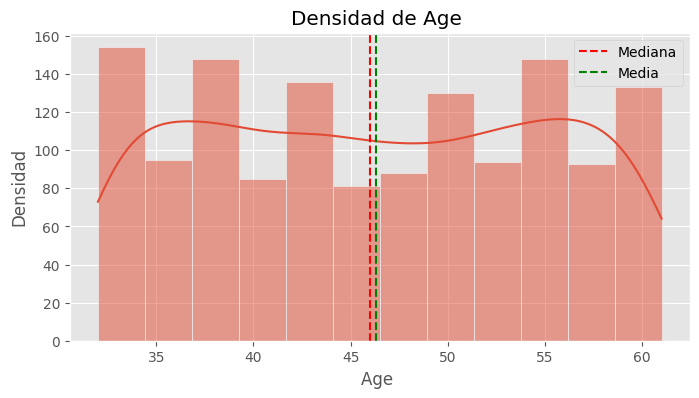

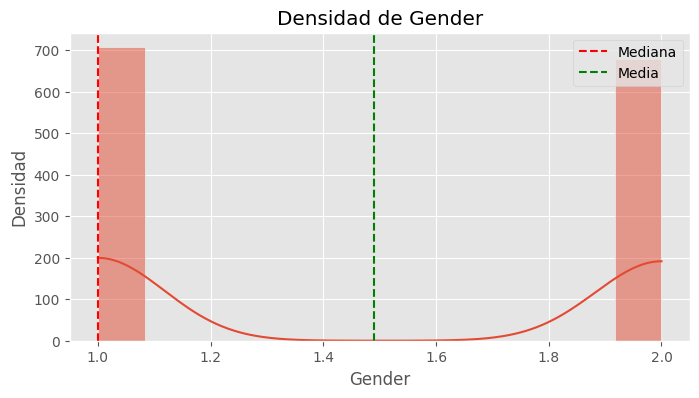

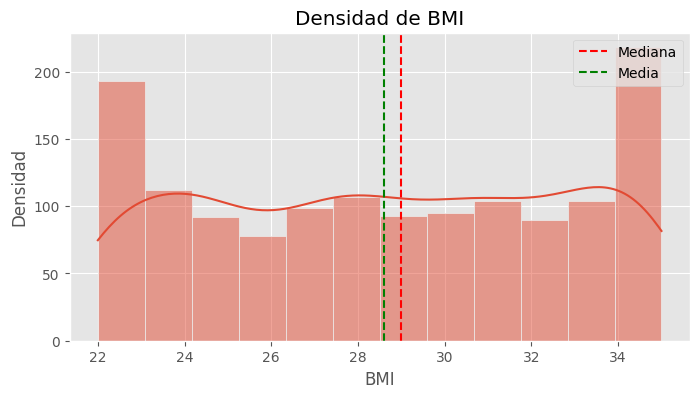

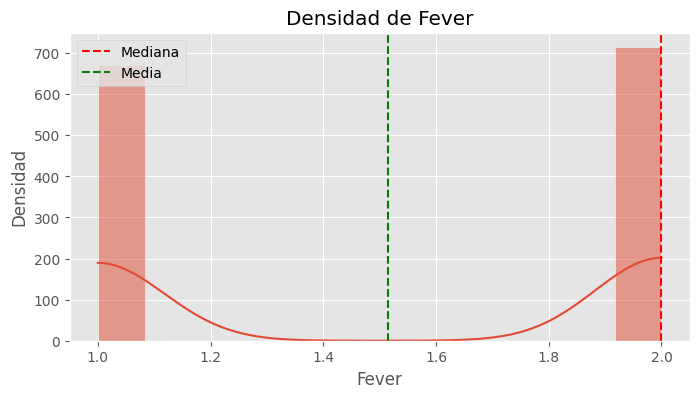

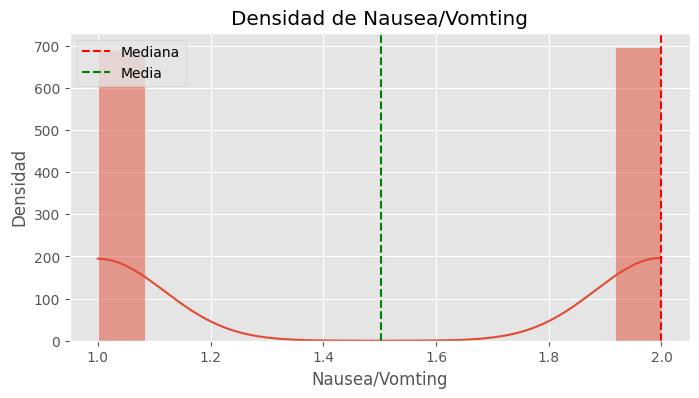

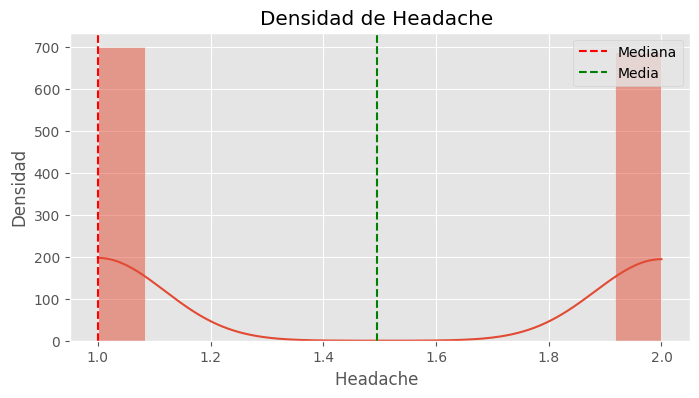

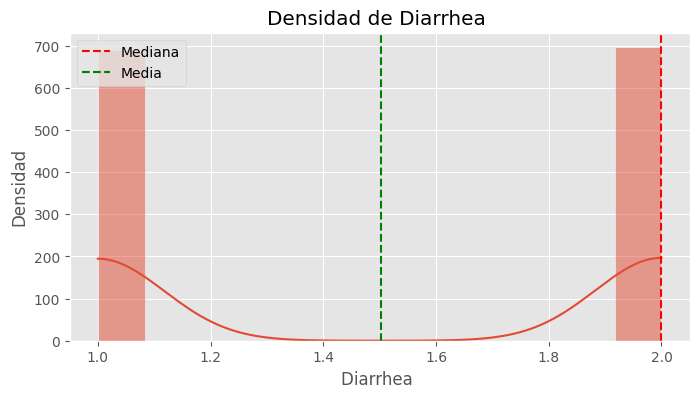

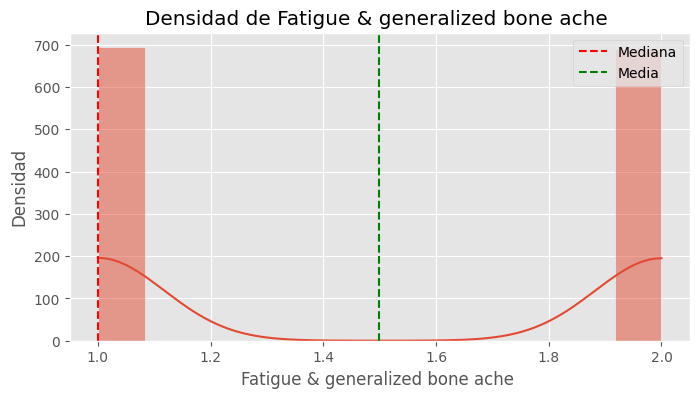

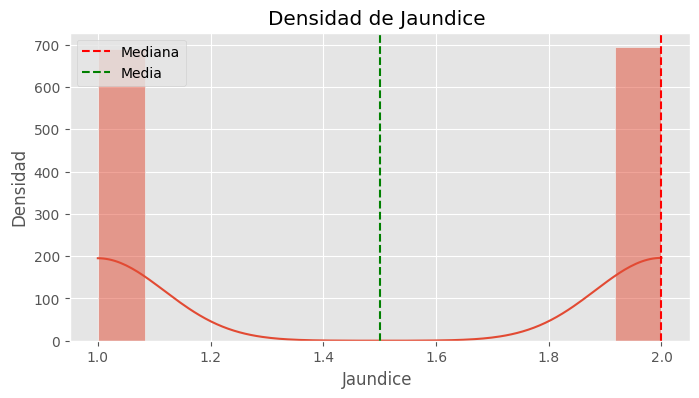

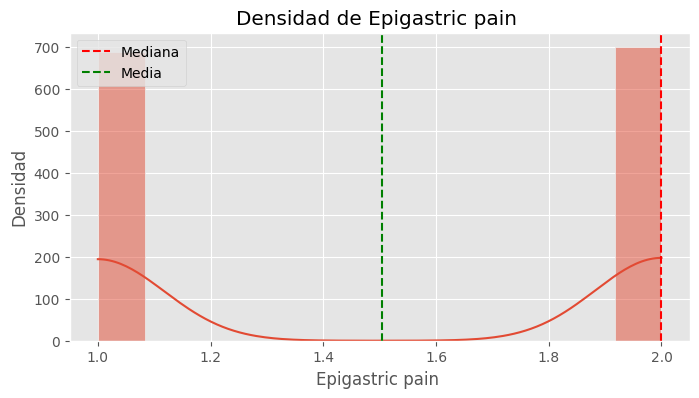

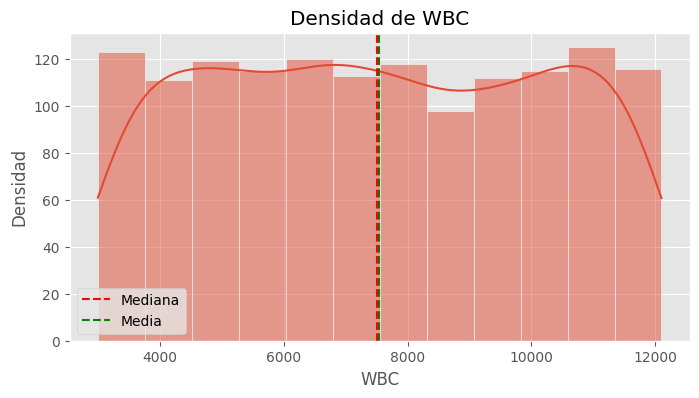

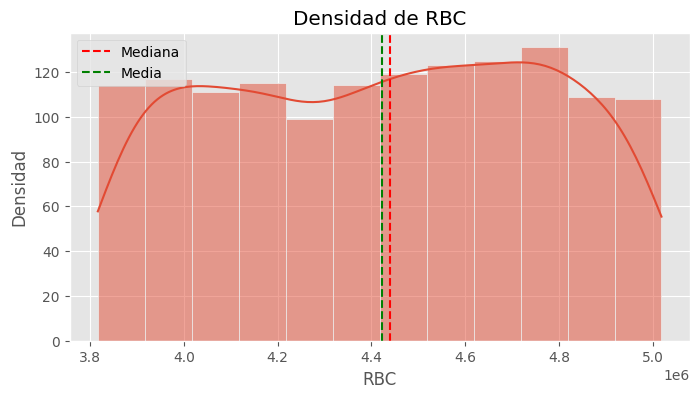

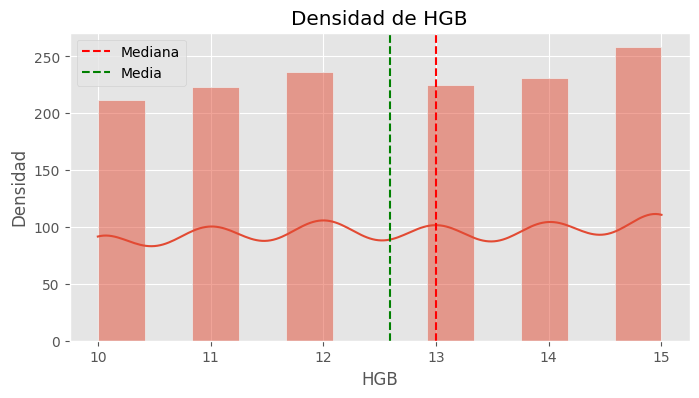

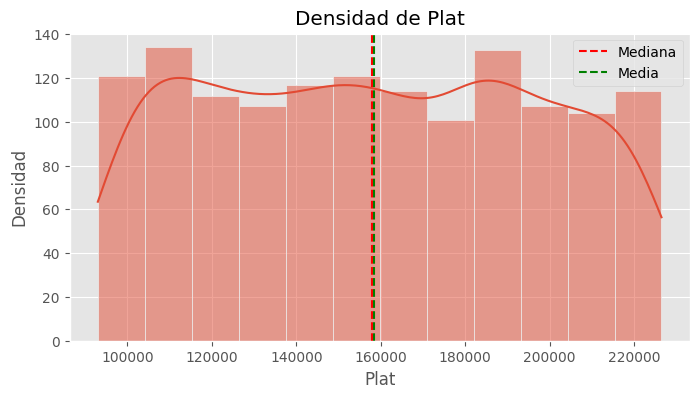

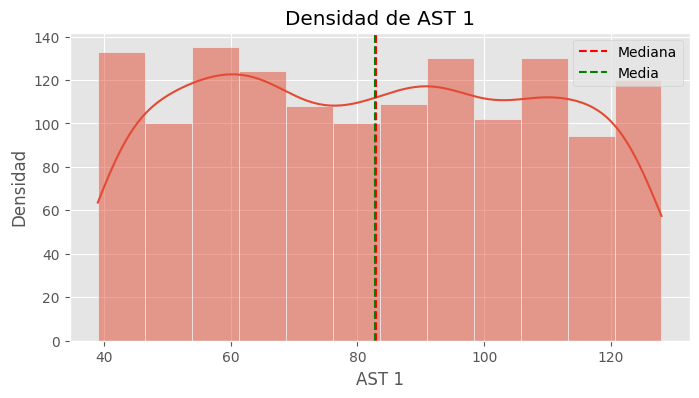

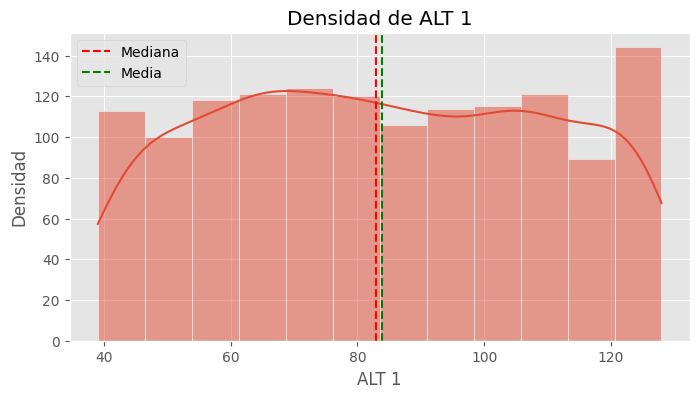

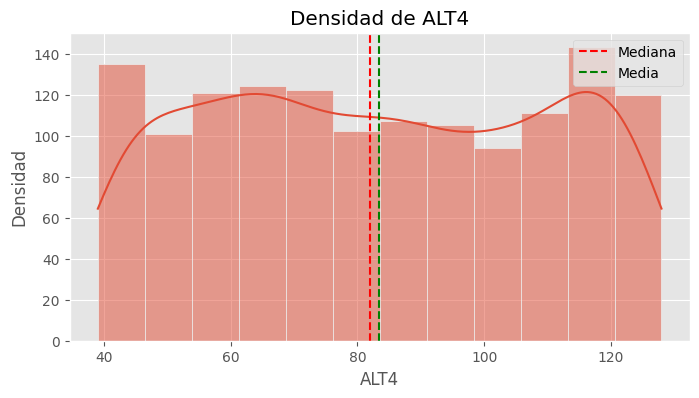

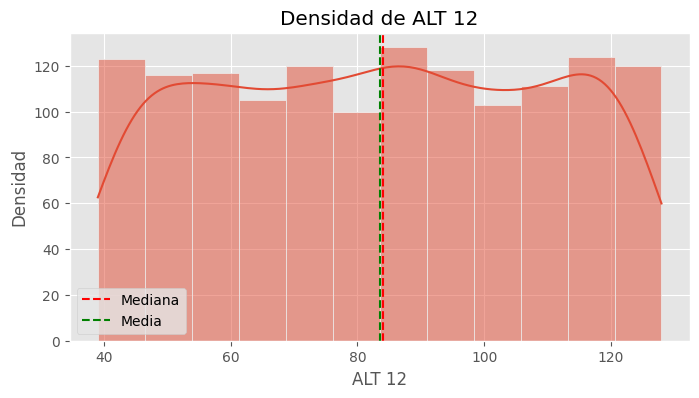

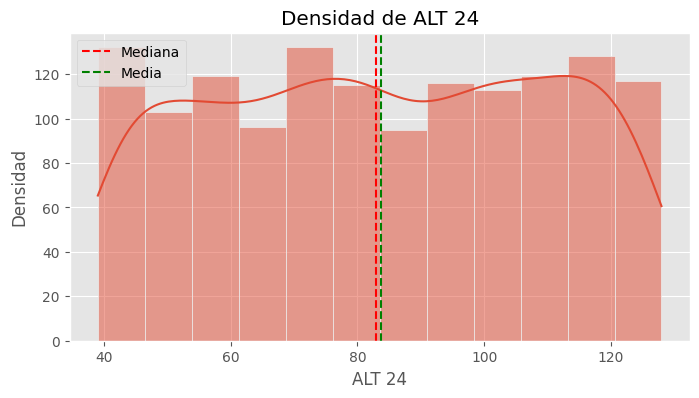

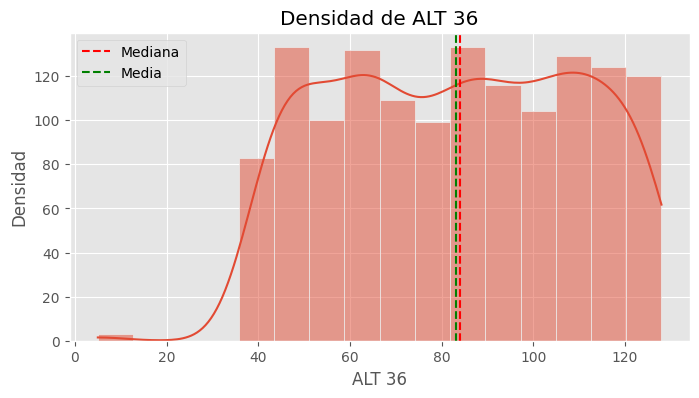

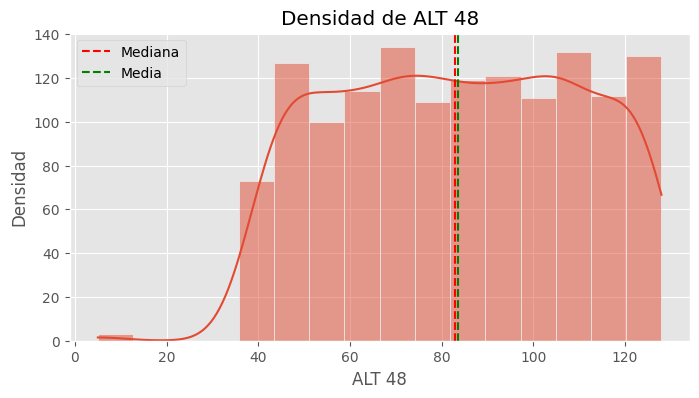

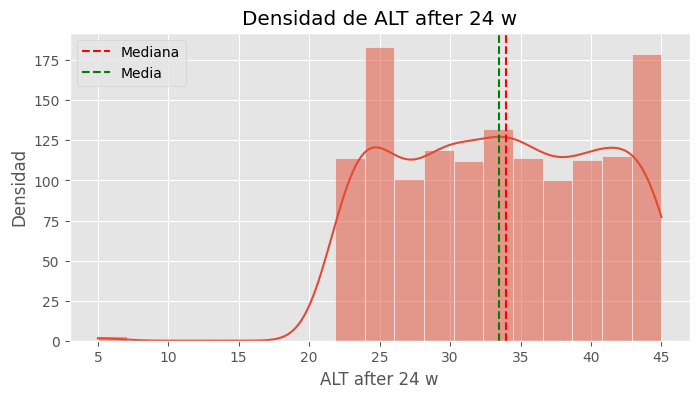

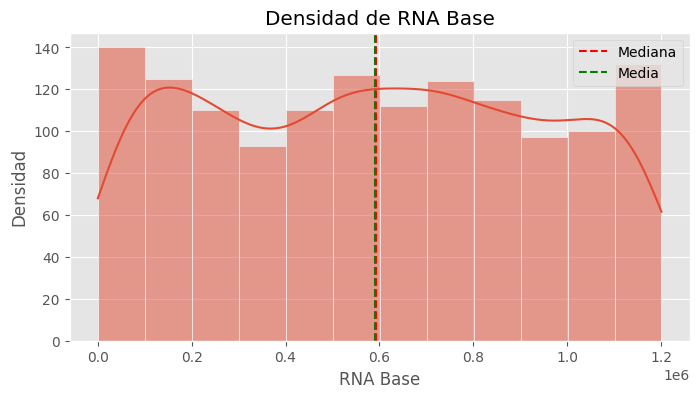

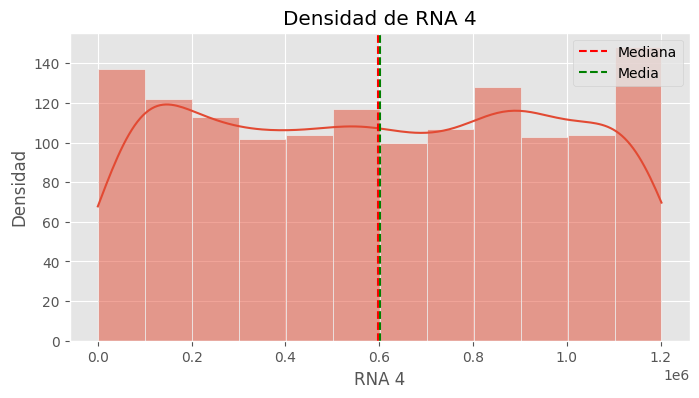

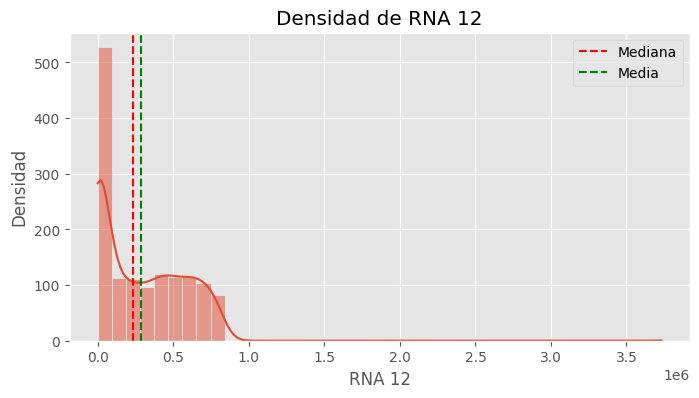

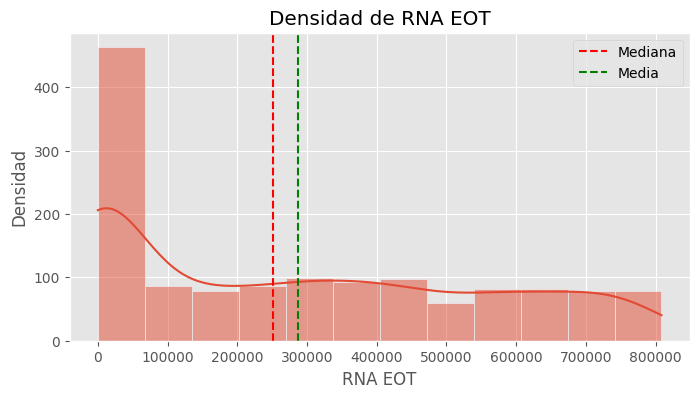

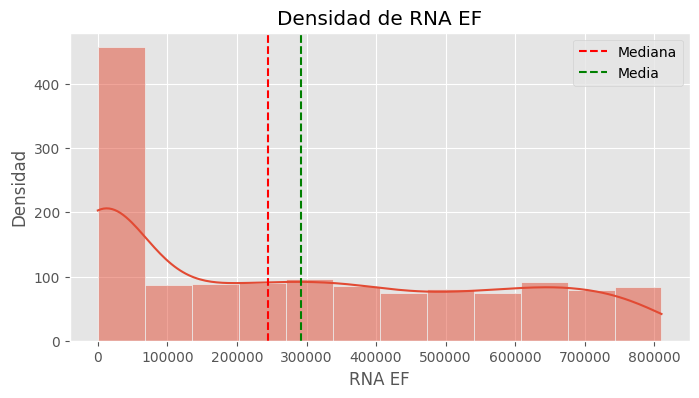

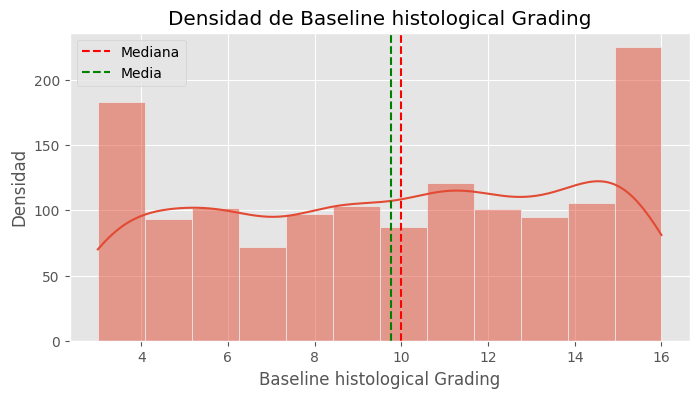

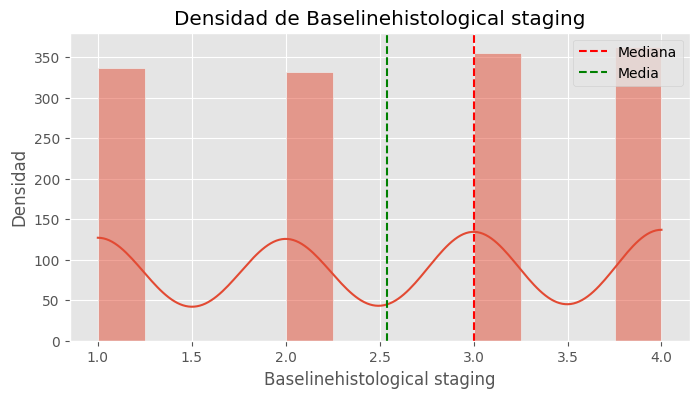

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Itera a través de todas las columnas numéricas y traza gráficos de densidad
for column in data.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 4))  # Tamaño de la figura
    sns.histplot(data[column], kde=True)  # Crea el gráfico de densidad
    plt.axvline(data[column].median(), color='red', linestyle='dashed', label='Mediana')  # Línea de la mediana
    plt.axvline(data[column].mean(), color='green', linestyle='dashed', label='Media')  # Línea de la media
    plt.title(f'Densidad de {column}')  # Título del gráfico
    plt.xlabel(column)  # Etiqueta del eje x
    plt.ylabel('Densidad')  # Etiqueta del eje y
    plt.legend()  # Muestra la leyenda
    plt.show()  # Muestra el gráfico

# Cierra todos los gráficos abiertos al final
plt.close('all')


<Axes: title={'center': 'Pearson Correlation of Features'}>

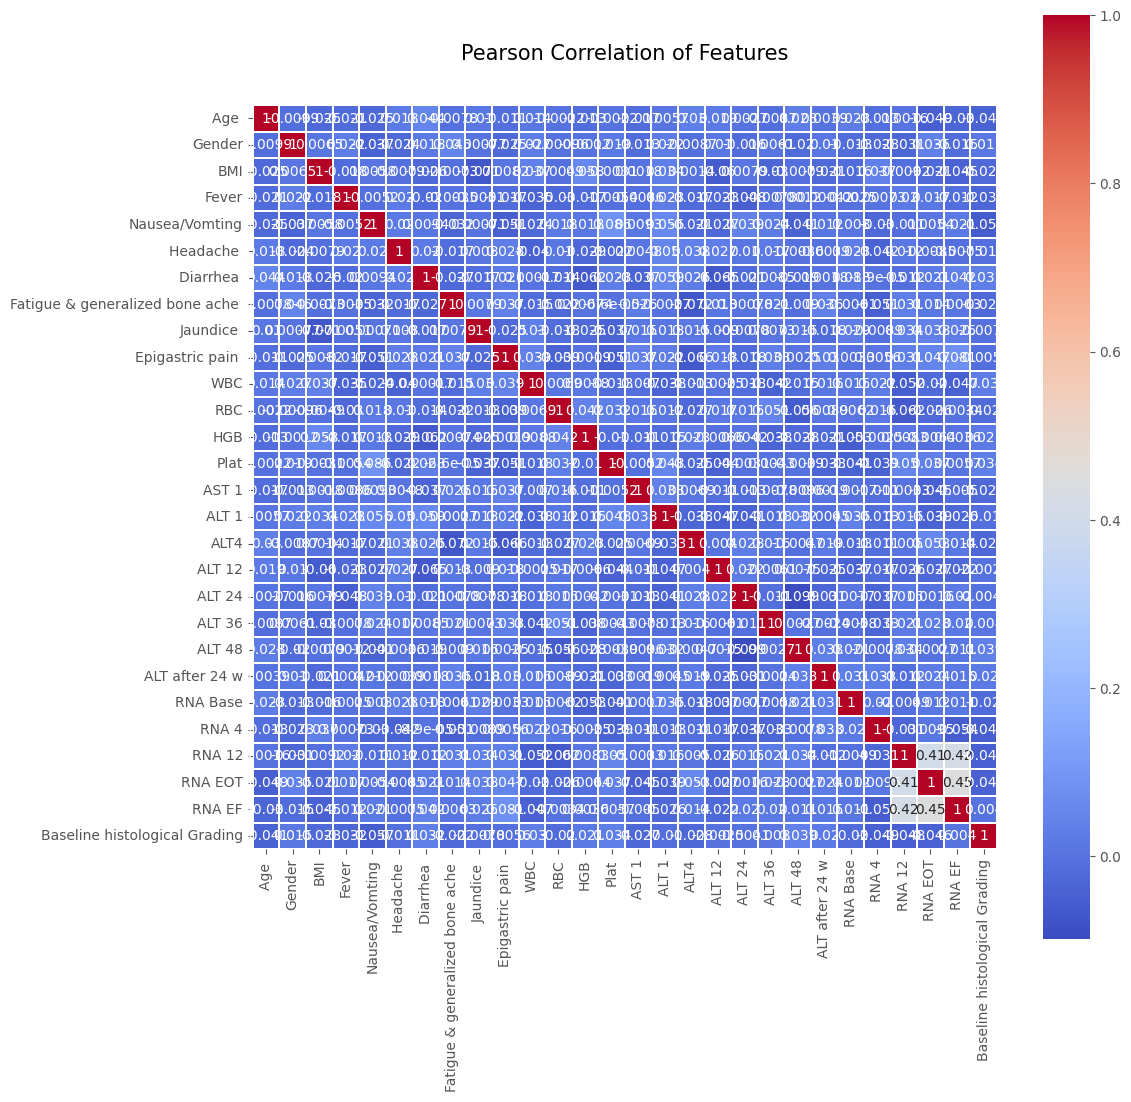

In [ ]:
import seaborn as sb
colormap = plt.cm.coolwarm
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(data.drop(['Baselinehistological staging'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
X=data.drop(["Baselinehistological staging"],axis=1)
y=data["Baselinehistological staging"]

In [ ]:
XTrain,XTest,yTrain,yTest=train_test_split(X,y,test_size=0.2)

In [ ]:
modelo=GaussianNB()
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTest)
print(yPredict)

[4 2 4 4 4 1 4 2 4 3 2 4 3 3 4 4 3 4 4 4 4 2 2 4 3 4 4 1 2 1 2 4 4 2 4 3 4
 2 4 4 1 4 4 4 4 1 3 2 3 2 1 4 3 4 2 4 4 3 2 4 1 4 4 4 4 4 4 4 4 4 2 4 3 3
 3 4 4 2 2 4 4 3 3 4 4 4 2 3 2 4 4 4 4 4 4 3 4 4 2 4 2 4 2 4 3 4 4 4 4 2 2
 4 2 2 2 4 2 4 2 2 1 4 3 2 3 2 2 4 4 2 1 4 4 1 4 3 4 4 4 2 2 3 2 4 2 1 3 4
 2 4 4 4 3 2 4 3 4 2 3 2 1 4 4 2 2 2 4 3 2 4 4 2 2 1 4 4 4 4 3 3 4 4 4 4 4
 4 2 3 3 3 4 4 4 3 3 4 4 2 4 2 2 2 3 4 3 1 4 1 2 4 3 4 2 4 3 4 4 3 4 2 3 3
 4 4 3 4 3 4 3 2 4 2 1 3 4 2 4 4 2 1 3 3 4 4 3 3 2 3 4 3 2 3 2 2 1 4 2 3 2
 4 2 3 4 4 3 4 1 2 4 1 4 3 4 4 4 3 2]


[[ 6 13 15 36]
 [ 5 19 12 28]
 [ 3 21 18 38]
 [ 6 15 12 30]]


<Axes: >

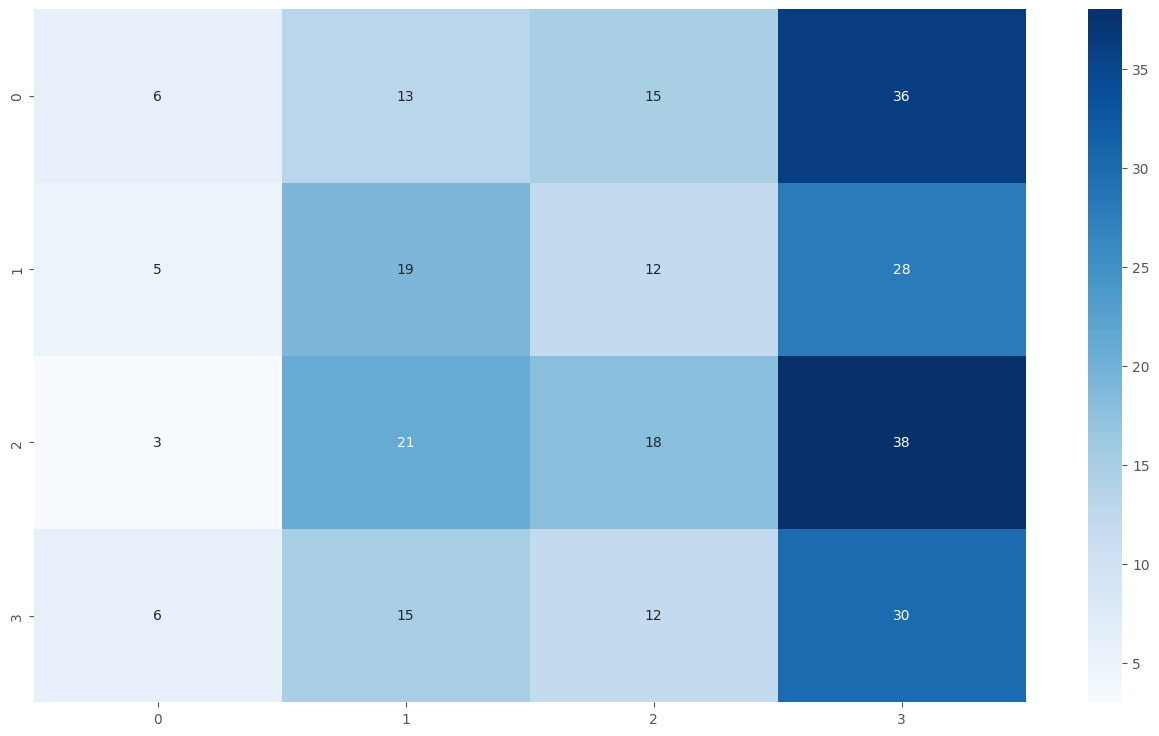

In [ ]:
matriz=confusion_matrix(yTest,yPredict)
print(matriz)
sns.heatmap(matriz,annot=True,cmap="Blues")

Accuracy

In [ ]:
print("Accruracy=",accuracy_score(yTest,yPredict))
print(matriz)


Accruracy= 0.26353790613718414
[[ 6 13 15 36]
 [ 5 19 12 28]
 [ 3 21 18 38]
 [ 6 15 12 30]]


Calculamos precision, recall,  f1-score,   support

In [ ]:
precision_recall_fscore_support(yTest,yPredict,average=None)
etiquetas=["fibrosis portal","pocos septos", "muchos septos", "cirrosis "]
print(classification_report(yTest,yPredict,target_names=etiquetas))

                 precision    recall  f1-score   support

fibrosis portal       0.30      0.09      0.13        70
   pocos septos       0.28      0.30      0.29        64
  muchos septos       0.32      0.23      0.26        80
      cirrosis        0.23      0.48      0.31        63

       accuracy                           0.26       277
      macro avg       0.28      0.27      0.25       277
   weighted avg       0.28      0.26      0.25       277

